In [8]:
import os
print(os.getcwd())


/work/festusedward-n


In [9]:
import os
print(os.path.exists('Dataset_TZ_KM/combined_keystroke_data.csv'))


False


In [10]:
import os
print(os.path.exists('Dataset_TZ_KM/combined_keystroke_data.csv'))


False


In [11]:
import os
print(os.listdir('/work/festusedward-n'))  # List the files in the current directory


['.vscode-server', '.local', 'feature_importance.png', '.bash_logout', 'combined_keystroke_data.csv', 'confusion_matrix.pdf', 'generate_keystroke_attack_data.ipynb', 'Dataset_TZ_KM', '.bash_history', '.profile', 'One-Class_ SVM_on_combined_benign_attack.ipynb', '.jupyter', '.dotnet', 'roc_curve.pdf', 'keystroke_attack_data.csv', '.bashrc', 'Ananomaly_Keystrokes_with_attack.ipynb', '.ipython', 'confusion_matrix.png', 'Anomaly_detection_XGBoost.ipynb', '.wget-hsts', '.ipynb_checkpoints', 'feature_importance.pdf', '.nv', '.cache', 'precision_recall_curve.pdf', 'roc_curve.png', 'precision_recall_curve.png', '.config']


In [12]:
import pandas as pd

# Load the dataset using the correct path
imputed_data = pd.read_csv('/work/festusedward-n/combined_keystroke_data.csv')

# Check the first few rows to confirm it loaded correctly
print(imputed_data.head())


        id        key   action  rhythm  dwell_time  flight_time  up_down_time  \
0  13533.0          6    press   0.088    0.088000     0.000000         0.000   
1  17984.0  Backspace    press   0.000    0.000000     3.632000         0.037   
2  22451.0          0  release   0.085    0.085000     0.000000         0.000   
3  22723.0          7    press   0.263    0.162087     0.249440         0.388   
4   6420.0          3    press   0.084    0.111101     0.020516         0.006   

   session_duration  user_id                   timestamp  label  
0             9.192     57.0  2025-05-14 09:55:25.411+00      0  
1            14.293     69.0  2025-05-14 14:38:49.919+00      0  
2             4.246     83.0  2025-05-17 13:43:02.928+00      0  
3            13.432     83.0   2025-05-17 14:52:12.34+00      1  
4             3.081     19.0  2025-04-30 08:23:53.339+00      1  


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94     19996
           1       0.97      0.91      0.94     19996

    accuracy                           0.94     39992
   macro avg       0.94      0.94      0.94     39992
weighted avg       0.94      0.94      0.94     39992

Confusion Matrix:
[[19512   484]
 [ 1797 18199]]


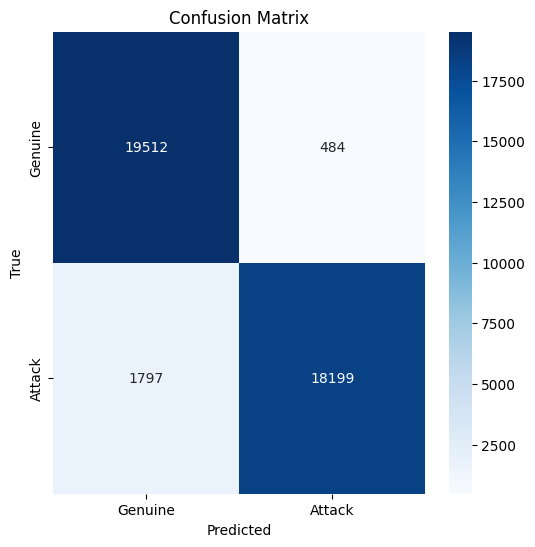

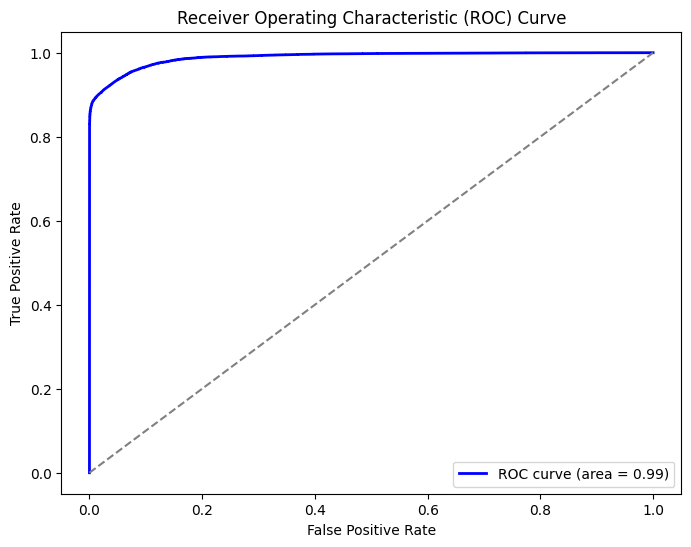

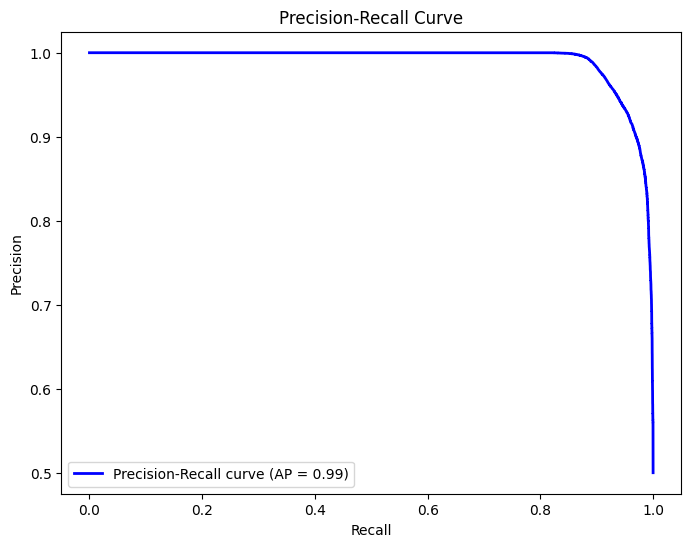

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Step 1: Load the dataset
imputed_data = pd.read_csv('/work/festusedward-n/combined_keystroke_data.csv')

# Step 2: Separate features and target variables
X = imputed_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')
y = imputed_data['label']

# Step 3: Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Step 4: Handle missing values (if necessary)
X = X.fillna(X.mean())

# Step 5: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 7: Train the model using XGBoost
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_resampled, y_resampled)

# Step 8: Predict using the trained model
y_pred = model_xgb.predict(X_scaled)

# Step 9: Evaluate the model
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Attack'], yticklabels=['Genuine', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y, model_xgb.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plotting the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y, model_xgb.predict_proba(X_scaled)[:, 1])
average_precision = average_precision_score(y, model_xgb.predict_proba(X_scaled)[:, 1])

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94     19996
           1       0.97      0.91      0.94     19996

    accuracy                           0.94     39992
   macro avg       0.94      0.94      0.94     39992
weighted avg       0.94      0.94      0.94     39992

Confusion Matrix:
[[19512   484]
 [ 1797 18199]]


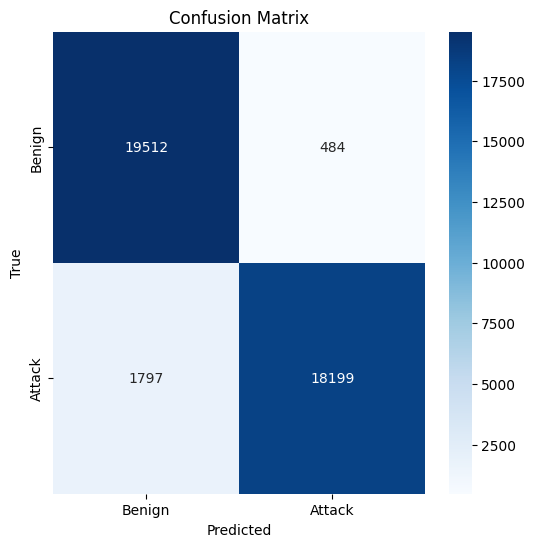

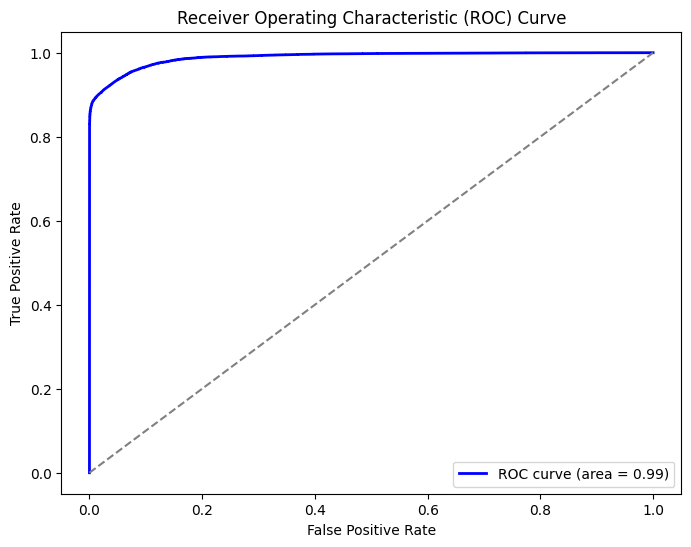

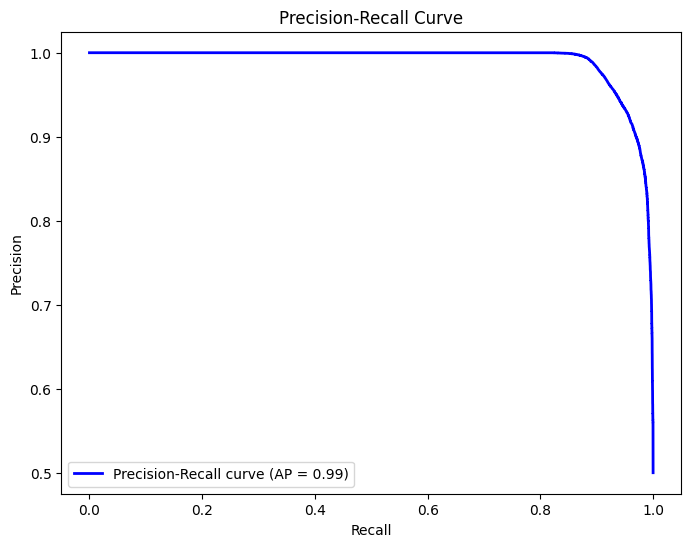

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Step 1: Load the dataset
imputed_data = pd.read_csv('/work/festusedward-n/combined_keystroke_data.csv')

# Step 2: Separate features and target variables
X = imputed_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')
y = imputed_data['label']

# Step 3: Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Step 4: Handle missing values (if necessary)
X = X.fillna(X.mean())

# Step 5: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 7: Train the model using XGBoost
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_resampled, y_resampled)

# Step 8: Predict using the trained model
y_pred = model_xgb.predict(X_scaled)

# Step 9: Evaluate the model
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the confusion matrix plot as PNG and PDF
plt.savefig('confusion_matrix.png', format='png')
plt.savefig('confusion_matrix.pdf', format='pdf')

plt.show()

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y, model_xgb.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Save the ROC curve plot as PNG and PDF
plt.savefig('roc_curve.png', format='png')
plt.savefig('roc_curve.pdf', format='pdf')

plt.show()

# Plotting the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y, model_xgb.predict_proba(X_scaled)[:, 1])
average_precision = average_precision_score(y, model_xgb.predict_proba(X_scaled)[:, 1])

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

# Save the Precision-Recall curve plot as PNG and PDF
plt.savefig('precision_recall_curve.png', format='png')
plt.savefig('precision_recall_curve.pdf', format='pdf')

plt.show()
